# Sklearn Digits Data Analysis

### Getting the data in order

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

digits = datasets.load_digits()

In [2]:
X = digits.data
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
print(X.shape)

(1797, 64)


In [5]:
y = digits.target
print(y)

[0 1 2 ... 8 9 8]


In [6]:
print(y.shape)

(1797,)


### Performing K-fold Cross Validation

In [7]:
def do_Kfold(model, X, y, k, scaler = None, random_state = 146):
    from sklearn.model_selection import KFold

    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))

    return train_scores, test_scores

In [8]:
from sklearn.svm import SVC as SVC

In [9]:
svc = SVC()

In [10]:
results = do_Kfold(model = svc, X = digits.data, y = y, k = 25, scaler = None, random_state = 146)

In [11]:
results

([0.9959420289855072,
  0.9959420289855072,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9971014492753624,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9976811594202899,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.996523754345307,
  0.996523754345307,
  0.9959443800695249],
 [1.0,
  0.9722222222222222,
  0.9861111111111112,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  0.9722222222222222,
  0.9583333333333334,
  0.9861111111111112,
  0.9861111111111112,
  0.9861111111111112,
  1.0,
  1.0,
  0.9722222222222222,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  1.0,
  1.0,
  1.0,
  0.9859154929577465,
  1.0,
  0.9859154929577465])

In [12]:
np.mean(results[1])

0.9888732394366196

#### The scores are very good

### Now lets do a single train test split

In [13]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25)

### Then fit and score the model

In [14]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [15]:
svc.score(X_test, y_test)

0.98

### Hyperparameter optimization

In [16]:
param_grid = dict(C=np.linspace(0.01, 10, 10), kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
                  gamma = ['scale', 'auto'])
#use 10 folds
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=10, random_state=201, shuffle = True)
grid = GridSearchCV(svc, param_grid=param_grid, cv=cv, scoring='accuracy')
#create the gridsearchCV object, score on accuracy
#fit the gridsearch
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.9844444444444445

In [17]:
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')

The best parameters are {'C': 2.23, 'gamma': 'scale', 'kernel': 'rbf'} with a score of 0.99


In [18]:
svc = SVC(C = grid.best_params_['C'], gamma = grid.best_params_['gamma'], kernel = grid.best_params_['kernel'])
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9844444444444445

### Displaying the results

In [19]:
predicted = svc.predict(X_test)
print(predicted)

[9 6 9 0 7 8 9 7 0 4 5 5 8 6 3 4 7 9 3 0 1 2 4 3 0 2 2 2 6 3 4 2 3 1 2 6 2
 0 8 8 2 4 7 0 5 5 1 9 9 0 1 5 0 7 4 7 3 1 0 4 7 4 2 4 4 9 8 3 7 6 7 0 3 9
 7 0 5 0 0 3 2 6 5 0 9 0 0 3 4 8 2 4 5 6 6 9 1 7 9 7 0 8 1 8 8 2 0 9 4 6 6
 4 0 9 2 4 1 5 9 0 5 2 3 2 7 2 3 4 4 6 7 3 7 6 4 4 4 6 5 0 3 2 5 9 8 1 9 4
 6 6 0 6 9 7 8 8 9 7 2 5 6 4 6 1 5 5 4 2 6 1 2 7 8 0 2 2 8 6 8 0 8 8 3 6 3
 1 2 1 0 3 3 3 4 5 3 5 8 0 1 5 6 3 4 3 8 6 6 6 2 8 8 3 8 9 0 9 5 0 7 1 9 0
 2 2 8 7 2 7 1 9 0 0 0 0 3 1 7 2 1 9 6 1 0 0 3 4 7 1 4 4 9 5 3 2 0 1 1 5 8
 2 5 1 7 3 3 6 4 2 2 9 7 3 6 1 6 2 4 5 2 7 4 8 6 3 7 8 0 2 6 2 0 0 1 2 2 2
 7 8 9 7 7 0 7 8 8 4 2 2 7 0 5 5 7 7 8 2 8 0 0 1 7 1 8 3 6 4 6 7 8 3 5 7 2
 9 5 0 4 1 9 1 2 6 9 6 3 8 4 5 9 0 3 5 5 5 8 0 8 1 4 6 6 5 6 9 8 0 5 1 7 4
 4 9 1 7 2 0 7 8 3 6 7 4 9 3 2 8 1 5 6 2 2 7 4 1 7 5 7 5 9 6 1 2 2 5 4 0 5
 9 4 5 9 2 2 6 1 7 9 6 1 1 6 7 8 9 2 3 9 2 0 0 4 9 0 1 9 5 8 2 0 0 0 2 8 8
 9 9 6 0 7 2]


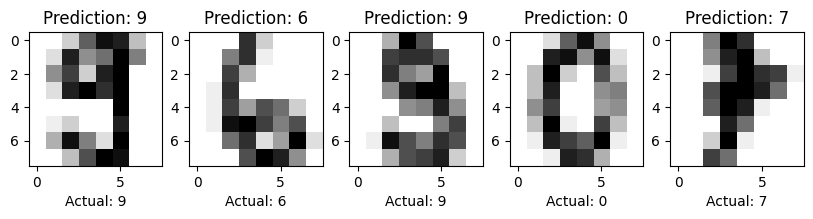

In [20]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for ax, image, prediction, actual in zip(axes, X_test[0:5], predicted[0:5], y_test[0:5]):
    # ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    ax.set_xlabel(f"Actual: {actual}")

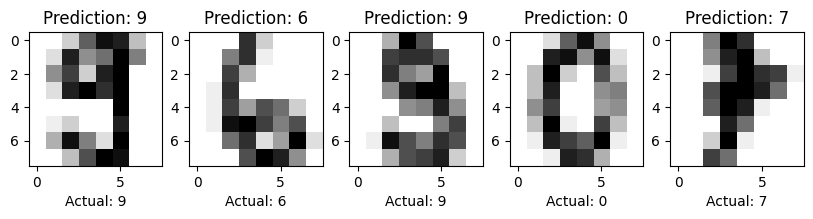

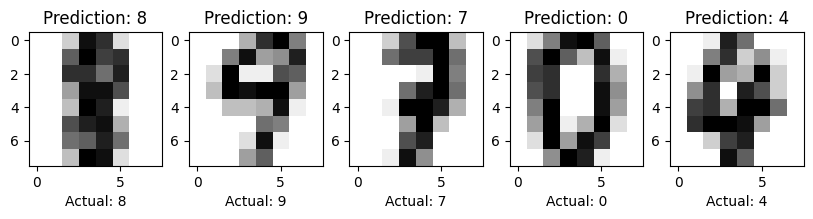

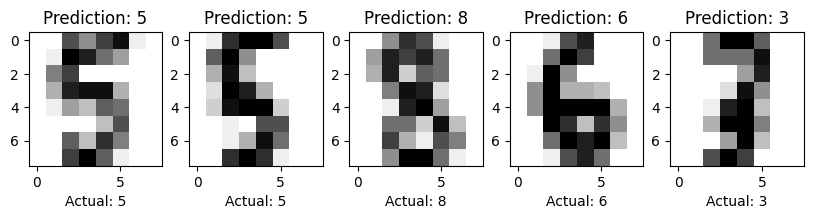

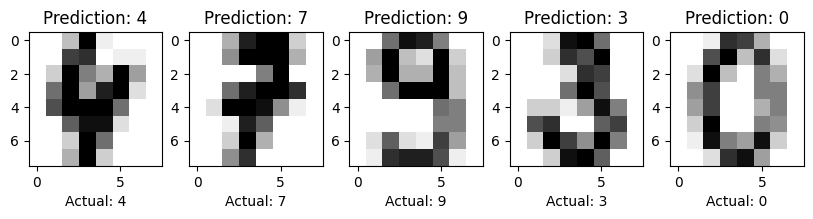

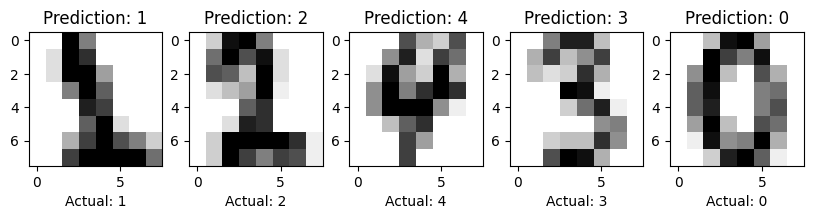

In [21]:
for i in np.arange(0, 25, 5):
    _, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
    for ax, image, prediction, actual in zip(axes, X_test[(i):(i+5)], predicted[(i):(i+5)], y_test[(i):(i+5)]):
        # ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")
        ax.set_xlabel(f"Actual: {actual}")

## Training a basic Keras Neural Network

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
import tensorflow as tf

# Load the digits dataset
digits = datasets.load_digits()
y = digits.target

# Reshape the input data to fit the expected input shape of the Conv2D layer
X = digits.images.reshape(-1, 8, 8, 1)  # Assuming the original image size is 8x8

# Normalize the input data
X = X / 16.0  # Since pixel values range from 0 to 16

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)


In [24]:
X_train.shape

(1437, 8, 8, 1)

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train,epochs=38)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(X_test, y_test)


MODEL TRAINING:
Epoch 1/38
45/45 [==============================] - 1s 2ms/step - loss: 1.9411 - accuracy: 0.5017
Epoch 2/38
45/45 [==============================] - 0s 2ms/step - loss: 1.1379 - accuracy: 0.8559
Epoch 3/38
45/45 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.9047
Epoch 4/38
45/45 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.9269
Epoch 5/38
45/45 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.9408
Epoch 6/38
45/45 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9513
Epoch 7/38
45/45 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9576
Epoch 8/38
45/45 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9624
Epoch 9/38
45/45 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9701
Epoch 10/38
45/45 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9687
Ep

## Using a convolutional neural network

In [26]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train, epochs=38)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(X_test, y_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               36992     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 38602 (150.79 KB)
Trainable params: 38602 (150.79 KB)
Non-trainable params: 0 (0.00 Byte)
________________

## The final accuracy scores for the convolutional neural network are higher on average than the basic neural network. However, the grid search svm yielded *slightly* higher scores than the convolutional neural network because this is just a simple task. In more complicated examples, one can see the effectivness of neural networks on full display

## Let's create some functions and callbacks to simplify things.

In [27]:
def reshape_and_normalize(X, y):

    digits = datasets.load_digits()

    y = digits.target

    # Reshape the images to add an extra dimension
    X = X.reshape(-1, 8, 8, 1)  # Assuming the original image size is 8x8

    # Normalize the input data
    X = X / 16.0  # Since pixel values range from 0 to 16

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = reshape_and_normalize(X, y)

print(f"Maximum pixel value after normalization: {np.max(X_train)}\n")
print(f"Shape of training set after reshaping: {X_train.shape}\n")
print(f"Shape of one image after reshaping: {X_train[0].shape}")

Maximum pixel value after normalization: 0.0625

Shape of training set after reshaping: (1437, 8, 8, 1)

Shape of one image after reshaping: (8, 8, 1)


In [29]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            # if logs.get('accuracy') > 0.95:
            if logs.get('accuracy') > 0.95:

                print("\nReached 95% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [30]:
def convolutional_model():

    #Define the model
    model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    # Use same settings
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model

In [31]:
model = convolutional_model()

# Instantiate the callback class
callbacks = myCallback()

# Train the model
history = model.fit(X_train, y_train, epochs=38, callbacks=[callbacks])

Epoch 1/38
45/45 [==============================] - 1s 4ms/step - loss: 2.2809 - accuracy: 0.2582
Epoch 2/38
45/45 [==============================] - 0s 4ms/step - loss: 2.1497 - accuracy: 0.6110
Epoch 3/38
45/45 [==============================] - 0s 4ms/step - loss: 1.8076 - accuracy: 0.6500
Epoch 4/38
45/45 [==============================] - 0s 3ms/step - loss: 1.3282 - accuracy: 0.7613
Epoch 5/38
45/45 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.8267
Epoch 6/38
45/45 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.8559
Epoch 7/38
45/45 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.8831
Epoch 8/38
45/45 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.8887
Epoch 9/38
45/45 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8942
Epoch 10/38
45/45 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.9061
Epoch 11/38
45/45 [

## We've been using the 'adam' optimizer, but there is some debate on which optimizer is the best. The 'adam' optimizer is agreed to be the best starting point, but in certain situations other optimizers like RMSprop can beat it to the global minimum. Let's see which one excels here by taking a look at how long (how many epochs) each optimizer takes to reach 98% accuracy.

In [32]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            # if logs.get('accuracy') > 0.95:
            if logs.get('accuracy') > 0.98:

                print("\nReached 98% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [44]:
def convolutional_model_SGD():

    #Define the model
    model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    # Use same settings
    model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model


model = convolutional_model_SGD()

# Instantiate the callback class
callbacks = myCallback()

# Train the model
history = model.fit(X_train, y_train, epochs = 100, callbacks=[callbacks])

Epoch 1/100
45/45 [==============================] - 1s 5ms/step - loss: 2.3018 - accuracy: 0.1037
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 2.3005 - accuracy: 0.1037
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2999 - accuracy: 0.0988
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2995 - accuracy: 0.1065
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2992 - accuracy: 0.1211
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 2.2987 - accuracy: 0.1371
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2983 - accuracy: 0.1587
Epoch 8/100
45/45 [==============================] - 0s 6ms/step - loss: 2.2980 - accuracy: 0.1267
Epoch 9/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2978 - accuracy: 0.1204
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2976 - accuracy: 0.1733
Epoch 11/

## Wow, even after 100 iterations SGD has not reached even 50% accuracy. Let's try RMSprop

In [47]:
def convolutional_model_with_RMSprop():

    #Define the model
    model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    # Use same settings
    model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model


model = convolutional_model_with_RMSprop()

# Instantiate the callback class
callbacks = myCallback()

# Train the model
history = model.fit(X_train, y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
45/45 [==============================] - 1s 4ms/step - loss: 2.2925 - accuracy: 0.1997
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.2490 - accuracy: 0.4349
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 2.1409 - accuracy: 0.5720
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 1.9468 - accuracy: 0.6827
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 1.6833 - accuracy: 0.7349
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 1.3939 - accuracy: 0.7697
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 1.1281 - accuracy: 0.8051
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 0.9076 - accuracy: 0.8316
Epoch 9/100
45/45 [==============================] - 0s 6ms/step - loss: 0.7413 - accuracy: 0.8601
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss: 0.6222 - accuracy: 0.8713
Epoch 11/

## After about 45 epochs, RMSprop has reached 98% accuracy.

In [50]:
def convolutional_model_with_Adagrad():

    #Define the model
    model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    # Use same settings
    model.compile(optimizer="adagrad", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model


model = convolutional_model_with_Adagrad()

# Instantiate the callback class
callbacks = myCallback()

# Train the model
history = model.fit(X_train, y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
45/45 [==============================] - 1s 4ms/step - loss: 2.3020 - accuracy: 0.0891
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.0877
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 2.3009 - accuracy: 0.0870
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 2.3005 - accuracy: 0.0974
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 2.3003 - accuracy: 0.1225
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 2.3000 - accuracy: 0.1399
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 2.2997 - accuracy: 0.1545
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2994 - accuracy: 0.1559
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 2.2991 - accuracy: 0.1601
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss: 2.2989 - accuracy: 0.1670
Epoch 11/

## Adagrad never reached it

In [51]:
def convolutional_model_with_Adam():

    #Define the model
    model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])


    # Use same settings
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model


model = convolutional_model_with_Adam()

# Instantiate the callback class
callbacks = myCallback()

# Train the model
history = model.fit(X_train, y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
45/45 [==============================] - 1s 4ms/step - loss: 2.2822 - accuracy: 0.2818
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.1820 - accuracy: 0.5901
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 1.9040 - accuracy: 0.6813
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 1.4274 - accuracy: 0.7815
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.9851 - accuracy: 0.8323
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.7214 - accuracy: 0.8580
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 0.8831
Epoch 8/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8942
Epoch 9/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.9026
Epoch 10/100
45/45 [==============================] - 0s 4ms/step - loss: 0.3708 - accuracy: 0.9068
Epoch 11/

## Adam, in this situation, beats out RMS prop on average. In this example, it reached 98% accuracy in just 40 epochs.